### Import packages

In [13]:
# #Unhide if you run the code from Google Colab (Select all lines below, then (Ctrl + /))
# !pip install graphviz
# !apt-get install graphviz


In [14]:

import io
import numpy as np
import pandas as pd
import datetime
import re 
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None  # default='warn'



import graphviz 



## Variables


In [15]:
#@title Variables

# Lecture IDs
LecIDs    =  ['','']

#@markdown Semester Start Date.
StartDate = '2017-01-20' #@param {type:"date"}
StartDate = pd.to_datetime(StartDate)

#@markdown Semester End Date.
EndDate = '2017-05-18' #@param {type:"date"}
EndDate = pd.to_datetime(EndDate)

#@markdown Grade A Start From 
A_Start   = 75 #@param {type:"number"}

#@markdown Grade B Start From 
B_Start   = 45 #@param {type:"number"}

#@markdown Final grade Column name in the grades file
FGradeCol = 'Overall' #@param {type:"string"}


#@markdown Student name in the Grade file
StdCol    = 'StudentId' #@param {type:"string"}


#@markdown Student Activity File Name  
#@markdown Ex: Select from list or Type
ActivityFile = 'Course_Activity_Obfuscated.csv' #@param ["Y4-DA_Activity_Obfuscated.csv"  , "BI_Activity_Obfuscated.csv" ,  "ADS_Activity_Obfuscated.csv","a1.csv","Y1_Semester2_Sdev_Activity_Obfuscated.csv"] {allow-input: true}



#@markdown Student Grades File Name
#@markdown Ex: Select from list or Type
GradeFile    = 'Course_Grades_Obfuscated.csv' #@param ["Y4-DA-Final_Grade_Obfuscated.csv", "BI_Grade_Obfuscated.csv" , "ADS_Grade_Obfuscated.csv","Y1_Semester1_Sdev__Full_Results_Obfuscated.csv","Y1_Semester2_Sdev_Full_Results_Obfuscated.csv"] {allow-input: true}


### Import data

In [16]:
Activity = pd.read_csv(ActivityFile,encoding = "latin-1",low_memory = False)

In [17]:
Activity

,Affected user,Time,User full name,Event context,Component,Event name,Description,IP address,Origin
0,-,"11 May, 09:44",DuEnWgMN,Folder: Past Exam Papers,Folder,Course module viewed,The user with id 'x' viewed the 'folder' activ...,127.0.0.1,web
1,-,"11 May, 09:44",DuEnWgMN,Course: myCourseName,System,Course viewed,The user with id 'x' viewed the course with id...,127.0.0.1,web
2,-,"11 May, 09:07",DuEnWgMN,File: Sample Exam Paper,File,Course module viewed,The user with id 'x' viewed the 'resource' act...,127.0.0.1,web
3,-,"11 May, 09:04",DuEnWgMN,Course: myCourseName,System,Course viewed,The user with id 'x' viewed the course with id...,127.0.0.1,web
4,-,"8 May, 10:01",DuEnWgMN,Course: myCourseName,System,Course viewed,The user with id 'x' viewed the course with id...,127.0.0.1,web
5,-,"8 May, 09:59",DuEnWgMN,Other,File,Course module viewed,The user with id 'x' viewed the 'resource' act...,127.0.0.1,web
6,-,"8 May, 09:59",DuEnWgMN,Course: myCourseName,System,Course viewed,The user with id 'x' viewed the course with id...,127.0.0.1,web
7,-,"10 Apr, 09:54",DuEnWgMN,Assignment: Group 7 Practical Test,Assignment,The status of the submission has been viewed.,The user with id 'x' has viewed the submission...,127.0.0.1,web
8,-,"10 Apr, 09:54",DuEnWgMN,Assignment: Group 7 Practical Test,Assignment,The user has accepted the statement of the sub...,The user with id 'x' has accepted the statemen...,127.0.0.1,web
9,-,"10 Apr, 09:54",DuEnWgMN,Assignment: Group 7 Practical Test,Assignment,Submission form viewed.,The user with id 'x' viewed their submission f...,127.0.0.1,web


In [18]:
len(Activity)

19296

In [19]:
Activity.describe().transpose()

,count,unique,top,freq
Affected user,19296,1,-,19296
Time,19296,9020,"22 Feb, 11:10",76
User full name,19296,113,yBQjBQg9,469
Event context,19296,49,Course: myCourseName,7503
Component,19296,8,System,7371
Event name,19296,16,Course module viewed,7164
Description,19296,365,The user with id 'x' viewed the course with id...,7058
IP address,19296,1,127.0.0.1,19296
Origin,19296,2,web,17918


In [20]:
Grades = pd.read_csv(GradeFile,encoding = "latin-1",low_memory = False)

In [21]:
len(Grades)

113

In [22]:
Grades.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Quiz(out of 15),113.0,7.318584,3.120398,1.0,5.0,7.0,10.0,15.0
Total CA (out of 50),113.0,26.168142,11.983547,4.0,18.0,25.0,36.0,50.0
Exam,113.0,46.433628,23.529190,0.0,32.0,43.0,60.0,98.0
Overall,113.0,49.628319,23.327710,6.0,34.0,46.0,66.0,99.0


# Functions

In [23]:
def getCounts(Activity, n,what):
#input: Activity Log and n top used resources 
#output: print count for the top n resource per resource category

      ResourcesFiltered = Activity[ Activity['Event name'] == 'Course module viewed' ]

      SummaryR = pd.DataFrame({'count' :ResourcesFiltered.groupby(['Component', 'Event context']).size()}).reset_index()

      SummaryR.sort_values(['Component','count','Event context'],ascending=False)
      
      SummaryR = SummaryR.set_index('Event context')
      
      if (what == 'T'):
              return pd.DataFrame(SummaryR.groupby(['Component'])['count'].nlargest(n))
      else:
              return pd.DataFrame(SummaryR.groupby(['Component'])['count'].nsmallest(n))

      
      
      
def getTermSummary(Activity):
      ViewData = Activity.loc[Activity['Event name'].isin(['Course viewed','Course module viewed'])]

      Summary = pd.DataFrame({'count' : ViewData.groupby( ['User full name','Component','Event name'] ).size()}).reset_index()

      # change from long to wide

      activities_term_wide = Summary.pivot('User full name','Component','count')

      activities_term_wide = activities_term_wide.fillna(0)
      
      activities_term_wide = pd.DataFrame(activities_term_wide).reset_index()
      
      activities_term_wide = activities_term_wide.add_prefix('lms_C_')
      
      activities_term_wide = activities_term_wide.rename(columns={'lms_C_User full name':StdCol})

      return activities_term_wide



def getWeeklySummary(Activity):
      ViewData = Activity.loc[Activity['Event name'].isin(['Course viewed','Course module viewed'])]
      wgp = ViewData.groupby(['User full name','Component','Event name', pd.Grouper(key='Time', freq='W-MON')])['Click'].sum().reset_index().sort_values('User full name')
      wgp = pd.DataFrame(wgp)
      wgp.reset_index()
      wgp.sort_values(['User full name','Time','Component'])
      cols = ['User full name','Component','Time']

      index  = pd.MultiIndex.from_product([wgp[col].unique() for col in cols],
                                         names=cols)

      result = wgp.set_index(['User full name','Component','Time']).reindex(index, fill_value=0).reset_index()
      del result['Event name'] 

      result["ComponentWeek"] =  result["Component"] + '_' + result["Time"].map(str)

      # change from long to wide
      activities_week_wide = result.pivot('User full name','ComponentWeek','Click')

      #activities_week_wide = activities_week_wide.fillna(0)
      activities_week_wide['Student'] = activities_week_wide.index

      return activities_week_wide
    
    
def getDailySummary(Activity):
      ViewData = Activity.loc[Activity['Event name'].isin(['Course viewed','Course module viewed'])]
      dgp = ViewData.groupby(['User full name', pd.Grouper(key='Time', freq='D')])['Click'].sum().reset_index().sort_values('User full name')
      dgp = pd.DataFrame(dgp)
      dgp.reset_index()
      #type(wgp)
      dgp.sort_values(['User full name','Time'])

      cols = ['User full name','Time']

      index  = pd.MultiIndex.from_product([dgp[col].unique() for col in cols],
                                         names=cols)

      result = dgp.set_index(['User full name','Time']).reindex(index, fill_value=0).reset_index()


      # change from long to wide
      activities_day_wide = result.pivot('User full name','Time','Click')


      #activities_week_wide = activities_week_wide.fillna(0)
      activities_day_wide['Student'] = activities_day_wide.index

      return activities_day_wide
    
    
def fixTimeCol(Activity):
      if not (np.issubdtype(Activity['Time'].dtype, np.datetime64)):
        for item, frame in Activity.iterrows():
          frame['Time'] = datetime.datetime.strptime(frame['Time'], "%d %b, %H:%M")
        Activity['Time'] = pd.to_datetime(Activity['Time'])
      StartYear = pd.to_numeric(StartDate.year)
      EndYear   = pd.to_numeric(EndDate.year)
      if '10' in Activity['Time'].dt.strftime("%m").unique().tolist():
        Activity['Time'] = Activity['Time'].apply(lambda x:x.replace(year=EndYear) if x.month < 8 else x.replace(year=StartYear) )  
      else :
        Activity['Time'] = Activity['Time'].apply(lambda x:x.replace(year=StartYear))
      return       pd.DataFrame(Activity.dtypes,columns=['Data Type'])
    

def findPattern(Activity):
      Activity['Click']=1
      Activity['Pattern_Description']=''
      for item, row in Activity.iterrows(): 
        Activity.loc[item, "Pattern_Description"] = re.sub("(?:id|submission|Turnitin) '.*?'", " '#'",row['Description'] )
      return pd.DataFrame( Activity.groupby(['Component','Event name', 'Pattern_Description']).size() )
      #return pd.DataFrame({'count' : Activity.groupby(['Component','Event name', 'Pattern_Description']).size()}).reset_index()

    
    
def SubmissionAnalysis(Activity):
      SAA =  pd.DataFrame(Activity[(Activity['Event name'].isin(['Add Submission','The user has accepted the statement of the submission.']) ) ].groupby(['User full name','Event context'])['Time'].max())

      SAA.Time = SAA.Time.dt.date

      SAAS = pd.DataFrame({'Count' : SAA.groupby(['Event context','Time']).size()} ).reset_index()

      # df2  = pd.DataFrame([['cc','2017-12-03',4],['cc','2017-12-04',11],['cc','2017-12-02',11]],columns=['Event context','Time','Count'])

      # SAAS = pd.concat([df2,SAAS])

      SAAS = SAAS.sort_values(['Event context','Time']).reset_index()

      Submission = pd.DataFrame( SAAS.loc[SAAS.reset_index().groupby(['Event context'])['Count'].idxmax()] )

      Submission = Submission[['Event context','Time']]

      Submission.rename(index=str, columns={"Time": "deadline"},inplace=True)

      Submission['deadline'] = pd.to_datetime(Submission['deadline'])

      Submission = Submission.sort_values(['deadline'])
      print('Calculated submission date deadline are:')
      print (pd.DataFrame(Submission) )
      print ('------------------------------------------')

      # Assuming that all assignmnet can be find based on the 'Event name'

      SA = Activity[(Activity['Event name'].isin(['Add Submission','The user has accepted the statement of the submission.']) ) ]

      SA = SA.merge(Submission, how='left', on='Event context')

      SA.sort_values(['User full name','Event context'], inplace=True)

      SA.drop_duplicates(['User full name','Event context'], inplace=True)

      SA = pd.DataFrame(SA, columns= list(SA) + ['lms_diff{}'.format(x) for x in range(1, len(Submission)+1)])

      SA.Time = SA.Time.dt.date

      SA.deadline = SA.deadline.dt.date

      i=1 
      for itemx, framex in Submission.iterrows():
        diff = 'lms_diff'+ str(i)
        for itemy, framey in SA.iterrows():
          if framex['Event context'] == framey['Event context']:
            SA.loc[itemy, diff] = ( framey['deadline'] - framey['Time']).days
          #       print (framey['deadline'])
          #       print (framey['Time'])
          #       print (framey['deadline'] - framey['Time'])
          #       print ( framey['deadline'] - framey['Time']  ) 
          #       print ('************')
        i=i+1

      SA[StdCol] = SA['User full name']

      filter_col = [col for col in SA if col.startswith('lms_diff')]
      #filter_col =  + filter_col 

      filter_col.insert(0, StdCol)

      SA = SA[filter_col]

      SA = pd.DataFrame(SA.groupby(StdCol).sum()).reset_index()
      
#       SA = Grades[[StdCol]].merge(SA, how='left', on=StdCol)

#       SA ['ASC'] = ASSC.count(axis=1) - 2


      return SA

    
def accessDaysCount(Activity):
      AFA = pd.DataFrame(Activity[['User full name','Time']])
      AFA.Time = AFA.Time.dt.date
      AFA = pd.DataFrame({'lms_AF' :AFA.groupby('User full name').Time.nunique()}).reset_index()
      AFA [StdCol] = AFA['User full name']
      AFA = AFA[[StdCol,'lms_AF']]
      return AFA
    
    
def maxGap(Activity):
      AFA = pd.DataFrame(Activity[['User full name','Time']])
      AFA.Time = AFA.Time.dt.date
      AFA = AFA.sort_values(by=['User full name','Time']).drop_duplicates()

      AFA['lms_GBD'] = (AFA.groupby(['User full name'], group_keys=False).apply(lambda g: g['Time'].diff().replace(0, np.nan).ffill())).dt.days

      GBD = pd.DataFrame(AFA.groupby(['User full name'])['lms_GBD'].max()).reset_index()

      GBD [StdCol] = GBD['User full name']
      GBD = GBD[[StdCol,'lms_GBD']]
      return GBD

def firstlastGap(Activity):
      AFA = pd.DataFrame(Activity[['User full name','Time']])
      AFA.Time = AFA.Time.dt.date
      FLG = pd.DataFrame(   AFA.groupby(['User full name'])['Time'].apply(lambda x: x.max() - x.min()) ).reset_index()
      FLG[StdCol] = FLG['User full name']
      FLG['lms_FLG'] = FLG['Time'].dt.days
      FLG = FLG[[StdCol,'lms_FLG']]
      return FLG

In [24]:
#isinstance(Activity['Time'], np.datetime64)

#Activity.select_dtypes(include=[np.datetime64])


#np.issubdtype(Activity['Time'].dtype, np.datetime64)



#print(Activity['Time'].dtypes)


## Take Data of interest

In [25]:
# Eliminate columns with only one value 

Activity = Activity[[c for c
                     in list(Activity)
                     if len(Activity[c].unique()) > 1]]  


Activity.describe().transpose()

,count,unique,top,freq
Time,19296,9020,"22 Feb, 11:10",76
User full name,19296,113,yBQjBQg9,469
Event context,19296,49,Course: myCourseName,7503
Component,19296,8,System,7371
Event name,19296,16,Course module viewed,7164
Description,19296,365,The user with id 'x' viewed the course with id...,7058
Origin,19296,2,web,17918


In [26]:
# Eliminate all rows with a Lecture ID in the LecIDs list

originalLength = len(Activity)

Activity = Activity[~Activity['User full name'].isin(LecIDs)]

print ("Current length: " + str(len(Activity)) + " ... " + str(originalLength - len(Activity)) + " Rows Deleted.")



Current length: 19296 ... 0 Rows Deleted.


## Fix Time Column

**1.   Assign DataTime data type to Time column.**

**2.   Add the year value**


In [27]:
fixTimeCol(Activity)

,Data Type
Time,datetime64[ns]
User full name,object
Event context,object
Component,object
Event name,object
Description,object
Origin,object


**Include activities within the semester start and end only**

In [28]:
mask = (Activity['Time'] >= StartDate) & (Activity['Time'] <= EndDate)

Activity = Activity.loc[mask]


# **Check rows patterns and combinations:**

- Hide dynamic values from Description column to get unique pattern count for each activity type.

In [29]:
findPattern( Activity ) 

0
Component       Event name                                         Pattern_Description                                     
Assignment      Course module instance list viewed                 The user with  '#' viewed the instance list for...    13
                Submission form viewed.                            The user with  '#' viewed their submission for ...   822
                                                                   The user with  '#'x'.                                  7
                The status of the submission has been viewed.      The user with  '#' has viewed the submission st...  2349
                                                                   The user with  '#'x'.                                 14
                The user has accepted the statement of the subm... The user with  '#' has accepted the statement o...   790
                                                                   The user with  '#'x05' for the assignment with ...     2
                                                                   The user with  '#'x72' for the assignment with ...     1
                                                                   The user with  '#'x97' for the assignment with ...     1
File            Course module viewed                               The user with  '#' viewed the 'resource' activi...  6350
                                                                   The user with  '#'resource' activity with cours...    13
Folder          Course module viewed                               The user with  '#' viewed the 'folder' activity...   137
                                                                   The user with  '#'folder' activity with course ...     1
Forum           Course module instance list viewed                 The user with  '#' viewed the instance list for...     2
                Course module viewed                               The user with  '#' viewed the 'forum' activity ...    95
                Course searched                                    The user with  '#' has searched the course with...     1
                Discussion viewed                                  The user with  '#' has viewed the discussion wi...   186
Overview report Grade overview report viewed                       The user with  '#' viewed the overview report i...    14
Quiz            Course module viewed                               The user with  '#' viewed the 'quiz' activity w...   210
                                                                   The user with  '#'quiz' activity with course mo...     1
                Quiz attempt reviewed                              The user with  '#' has had their attempt with  ...   130
                                                                   The user with  '#'x0' reviewed by the user with...     1
                Quiz attempt summary viewed                        The user with  '#' has viewed the summary for t...   154
                                                                   The user with  '#'x0' belonging to the user wit...     1
                Quiz attempt viewed                                The user with  '#' has viewed the attempt with ...   159
                                                                   The user with  '#'x0' belonging to the user wit...     1
System          Course module instance list viewed                 The user with  '#' viewed the list of resources...     2
                Course user report viewed                          The user with  '#' viewed the user report for t...    53
                Course viewed                                      The user with  '#' viewed the course with  '#'.     6792
                                                                   The user with  '#'x'.                                 27
                User list viewed                                   The user with  '#' viewed the list of users in ...   173
                User profile v

- Remove admin activities

In [30]:
# List of Event Name belong to admin
toBeRemovedList = ['User graded','User profile viewed','Quiz attempt viewed','Quiz attempt summary viewed','Quiz attempt reviewed']

beforeLength = len(Activity)

Activity = Activity[~Activity['Event name'].isin(toBeRemovedList)]

print ("Current length: " + str(len(Activity)) + " ... " + str(beforeLength - len(Activity)) + " Rows Deleted.")

Current length: 18147 ... 463 Rows Deleted.


# *Resource usage Analysis*

Show the **Top** 5 most used resource for each component 

# Results on a table


In [31]:
# Use getCounts function  to get the n most used resources per resource category
# Ex. getCounts(Activity, 5)

getCounts(Activity, 10,'T')

count
Component Event context                        
File      File: Lecture 1                   562
          File: Lecture 2                   535
          File: Lecture 3                   502
          File: Lecture 5                   449
          File: Lecture 4                   448
          File: Lecture 6                   439
          File: Lecture 7                   417
          File: Lab 1 Worksheet             333
          File: Lab 2 Worksheet             305
          File: Arrays Recap Lecture        293
Folder    Folder: Past Exam Papers          138
Forum     Forum: News forum                  56
          Forum: FOP2 - Discussion Forum     39
Quiz      Quiz: Group 6 MCQ                  38
          Quiz: Group 2 MCQ                  36
          Quiz: Group 7 MCQ                  30
          Quiz: Group 5 MCQ                  28
          Quiz: Group 1 MCQ                  26
          Quiz: Group 3 MCQ                  24
          Quiz: Group 4 MCQ                  19
          Quiz: Very Late MCQ                10

Show the **Least** 5 used resources for each component 



In [32]:
getCounts(Activity, 5,'L')

count
Component Event context                        
File      File: Lab 8 Worksheet             130
          File: Lab 7 Worksheet             148
          File: Sample Exam Paper           198
          File: Lab 4 Worksheet             201
          File: Lab 6 Worksheet             208
Folder    Folder: Past Exam Papers          138
Forum     Forum: FOP2 - Discussion Forum     39
          Forum: News forum                  56
Quiz      Quiz: Very Late MCQ                10
          Quiz: Group 4 MCQ                  19
          Quiz: Group 3 MCQ                  24
          Quiz: Group 1 MCQ                  26
          Quiz: Group 5 MCQ                  28

# Per group analysis


---


# Access Frequence Analysis
How many unique days did the student interact with course page?

In [33]:
AF = accessDaysCount(Activity)

AF

,StudentId,lms_AF
0,1T9XHHRd,36
1,1kKAsJBG,17
2,1nFKlIVK,18
3,2RjG3ome,19
4,2dFnmvD5,29
5,39OUyKYK,37
6,3t68xw15,40
7,5GAA4rMm,42
8,5KjSDcAm,24
9,5hAMelkT,55


# Time between first and last Activity
The number of days between the first and last activity. The bigger the better means the student is engaged from the start of the semester.

In [34]:
FLG = firstlastGap(Activity)
FLG

,StudentId,lms_FLG
0,1T9XHHRd,108
1,1kKAsJBG,90
2,1nFKlIVK,109
3,2RjG3ome,98
4,2dFnmvD5,109
5,39OUyKYK,101
6,3t68xw15,109
7,5GAA4rMm,106
8,5KjSDcAm,112
9,5hAMelkT,110


# Biggest time gap during the semester without any activities
The maximum numbers of days without any activity during the course

In [35]:
GBD =  maxGap(Activity) 
GBD

,StudentId,lms_GBD
0,1T9XHHRd,16.0
1,1kKAsJBG,24.0
2,1nFKlIVK,35.0
3,2RjG3ome,21.0
4,2dFnmvD5,18.0
5,39OUyKYK,25.0
6,3t68xw15,8.0
7,5GAA4rMm,15.0
8,5KjSDcAm,17.0
9,5hAMelkT,10.0


# Submission Analysis

For each assignmnet alone calculate the difference between the submissin deadline and the actual submission date.



*   Time is neglected, only date is considered.
*   Most frequent submission date is my avarage here



In [36]:
SA = SubmissionAnalysis(Activity)
SA


Calculated submission date deadline are:
                             Event context   deadline
14                Assignment: Lab 1 Upload 2017-01-29
21                Assignment: Lab 2 Upload 2017-02-05
29                Assignment: Lab 3 Upload 2017-02-12
37                Assignment: Lab 4 Upload 2017-02-19
51               Assignment: Lab 5  Upload 2017-03-06
56                Assignment: Lab 6 Upload 2017-03-12
64                Assignment: Lab 7 Upload 2017-03-19
76      Assignment: Late Labs 1 - 4 Upload 2017-03-25
3       Assignment: Group 4 Practical Test 2017-04-09
5       Assignment: Group 6 Practical Test 2017-04-09
1       Assignment: Group 2 Practical Test 2017-04-10
6       Assignment: Group 7 Practical Test 2017-04-10
2       Assignment: Group 3 Practical Test 2017-04-11
0       Assignment: Group 1 Practical Test 2017-04-12
4       Assignment: Group 5 Practical Test 2017-04-12
72                Assignment: Lab 8 Upload 2017-04-23
82  Assignment: Upload for Late Labs 5 - 

,StudentId,lms_diff1,lms_diff2,lms_diff3,lms_diff4,lms_diff5,lms_diff6,lms_diff7,lms_diff8,lms_diff9,lms_diff10,lms_diff11,lms_diff12,lms_diff13,lms_diff14,lms_diff15,lms_diff16,lms_diff17
0,1T9XHHRd,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1kKAsJBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
2,1nFKlIVK,0.0,0.0,4.0,-2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
3,2RjG3ome,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2dFnmvD5,2.0,1.0,1.0,0.0,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,39OUyKYK,0.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,3t68xw15,0.0,3.0,2.0,0.0,5.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,5GAA4rMm,7.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,5KjSDcAm,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,5hAMelkT,5.0,6.0,2.0,4.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0


# **Term-based views sum for each student per resource category:**

Heat map orgrooup based graph

In [37]:
Activity['Click']= 1 


TermSummary = getTermSummary(Activity)

TermSummary

Component,StudentId,lms_C_File,lms_C_Folder,lms_C_Forum,lms_C_Quiz,lms_C_System
0,1T9XHHRd,88.0,0.0,1.0,2.0,109.0
1,1kKAsJBG,30.0,3.0,0.0,2.0,27.0
2,1nFKlIVK,31.0,1.0,0.0,1.0,43.0
3,2RjG3ome,35.0,0.0,0.0,2.0,35.0
4,2dFnmvD5,49.0,0.0,0.0,3.0,70.0
5,39OUyKYK,61.0,1.0,6.0,1.0,83.0
6,3t68xw15,68.0,0.0,1.0,2.0,72.0
7,5GAA4rMm,57.0,0.0,0.0,1.0,77.0
8,5KjSDcAm,40.0,2.0,0.0,2.0,47.0
9,5hAMelkT,44.0,1.0,1.0,2.0,140.0


**Generate week based view sum:**

In [38]:
     
WeeklySummary =  getWeeklySummary(Activity)    
#WeeklySummary

# ***Weekly data for plot***

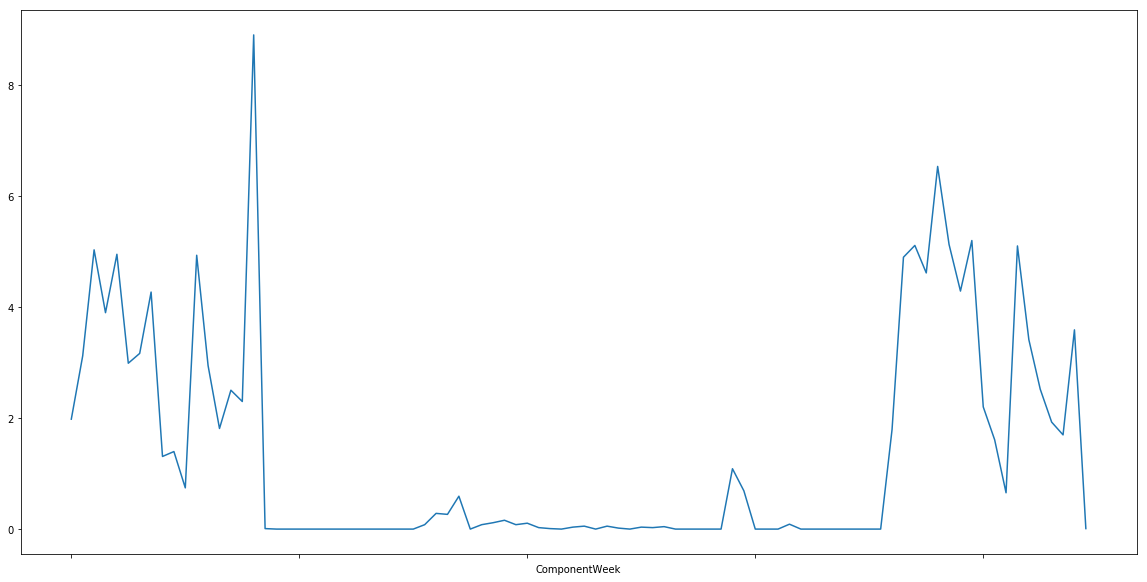

In [39]:

WeeklySummary.mean().transpose().plot(figsize=(20,10))

**Generate daily based view sum:**

In [40]:
    
DailySummary = getDailySummary(Activity)

#DailySummary

# **`Plot daily avarage click count`**

In [41]:
#DailySummary.mean().transpose().plot(figsize=(20,10))

# **Join Activity and Grades for each student **

In [42]:
Final = Grades.merge(TermSummary, how='left', on=StdCol)
Final = Final.merge(SA, how='left', on=StdCol)
Final = Final.merge(AF, how='left', on=StdCol)
Final = Final.merge(GBD, how='left', on=StdCol)
Final = Final.merge(FLG, how='left', on=StdCol)


# Final.sort_values(FGradeCol,ascending=False)

#Grades



**Plot pairwise relations between overall grade and views&marks columns**

In [43]:
Final._get_numeric_data()
Final.fillna(-222, inplace=True)

Final['Overall'] = ((Final['Total CA (out of 50)'] * 2) + Final['Exam'] )/2


#Final.drop([	'lms_diff11',	'lms_diff12'	,'lms_diff13'	,'lms_diff14'	,'lms_diff15'	,'lms_diff16'	,'lms_diff17'])


Final

,StudentId,Quiz(out of 15),Labs (out of 15),Practical (out of 20),Total CA (out of 50),Exam,Overall,lms_C_File,lms_C_Folder,lms_C_Forum,...,lms_diff11,lms_diff12,lms_diff13,lms_diff14,lms_diff15,lms_diff16,lms_diff17,lms_AF,lms_GBD,lms_FLG
0,RpsflRsQ,8,6,12,26,66,59.0,86.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26,18.0,109
1,CjstcYwt,12,13,17,42,76,80.0,94.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54,9.0,109
2,ORNLQn2i,10,5,13,28,56,56.0,61.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16,20.0,109
3,IKCbG0Z3,6,9,11,26,48,50.0,36.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41,9.0,97
4,UNttaO86,5,5,14,24,40,44.0,85.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27,19.0,85
5,6vJMgyQP,13,11,15,39,53,65.5,60.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33,12.0,112
6,hEVUkT58,13,15,17,45,88,89.0,128.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48,10.0,109
7,FkJaGcdP,6,7,14,27,35,44.5,80.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28,15.0,108
8,LSEukhRA,6,11,16,33,47,56.5,52.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23,21.0,107
9,r6Pauzkj,5,-,-,5,8,9.0,12.0,0.0,0.0,...,-222.0,-222.0,-222.0,-222.0,-222.0,-222.0,-222.0,5,42.0,57


Only one row (Overall)
Merge resource view count
No grades

In [44]:
%matplotlib inline
#Check how data locks like in distribution
#sns.pairplot(Final[[FGradeCol, 'ExamGrade','CAgrade',	'File',	'Folder',	'Forum',	'Page',	'System','URL','Quiz','diff1','AF']], hue=FGradeCol)

# sns.pairplot(Final._get_numeric_data(), hue=FGradeCol)
# sns.plt.show()

**Fast check for correlation**

In [45]:
xx = pd.DataFrame( Final._get_numeric_data().corr(method='spearman')) 

filter_col = [col for col in xx if col.startswith('lms_')]

xx = xx[filter_col]

cm = sns.light_palette("green", as_cmap=True)

xx.loc[xx.index == FGradeCol].style.format("{:.3}").background_gradient(cmap=cm, axis=1)

,lms_C_File,lms_C_Folder,lms_C_Forum,lms_C_Quiz,lms_C_System,lms_diff1,lms_diff2,lms_diff3,lms_diff4,lms_diff5,lms_diff6,lms_diff7,lms_diff8,lms_diff9,lms_diff10,lms_diff11,lms_diff12,lms_diff13,lms_diff14,lms_diff15,lms_diff16,lms_diff17,lms_AF,lms_GBD,lms_FLG
Overall,0.505,0.136,0.2,-0.0489,0.557,0.568,0.608,0.516,0.364,0.567,0.483,0.553,0.208,0.317,0.317,0.317,0.317,0.317,0.317,0.317,0.494,0.194,0.612,-0.441,0.39


In [46]:
#Final[[FGradeCol, 'ExamGrade','CAgrade',	'File',	'Folder',	'Forum',	'Page',	'System','URL','Quiz','diff']].corr(method='spearman')
#Final[[FGradeCol, 'ExamGrade','CAgrade',	'File',	'Folder',	'Forum',	'Page',	'System','URL','Quiz','diff1','AF']].corr(method='spearman').style.format("{:.5}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)
Final._get_numeric_data().corr(method='spearman').style.format("{:.3}").background_gradient(cmap=plt.get_cmap('Blues'), axis=1)


,Quiz(out of 15),Total CA (out of 50),Exam,Overall,lms_C_File,lms_C_Folder,lms_C_Forum,lms_C_Quiz,lms_C_System,lms_diff1,lms_diff2,lms_diff3,lms_diff4,lms_diff5,lms_diff6,lms_diff7,lms_diff8,lms_diff9,lms_diff10,lms_diff11,lms_diff12,lms_diff13,lms_diff14,lms_diff15,lms_diff16,lms_diff17,lms_AF,lms_GBD,lms_FLG
Quiz(out of 15),1.0,0.683,0.715,0.71,0.215,0.00987,0.0564,-0.064,0.265,0.434,0.368,0.348,0.241,0.36,0.237,0.235,0.131,0.151,0.151,0.151,0.151,0.151,0.151,0.151,0.274,0.0155,0.272,-0.148,0.284
Total CA (out of 50),0.683,1.0,0.901,0.974,0.496,0.116,0.199,-0.0195,0.557,0.559,0.605,0.521,0.362,0.561,0.458,0.578,0.22,0.315,0.315,0.315,0.315,0.315,0.315,0.315,0.483,0.206,0.605,-0.437,0.368
Exam,0.715,0.901,1.0,0.972,0.488,0.132,0.191,-0.0711,0.541,0.569,0.595,0.498,0.342,0.548,0.496,0.492,0.191,0.312,0.312,0.312,0.312,0.312,0.312,0.312,0.489,0.172,0.594,-0.424,0.403
Overall,0.71,0.974,0.972,1.0,0.505,0.136,0.2,-0.0489,0.557,0.568,0.608,0.516,0.364,0.567,0.483,0.553,0.208,0.317,0.317,0.317,0.317,0.317,0.317,0.317,0.494,0.194,0.612,-0.441,0.39
lms_C_File,0.215,0.496,0.488,0.505,1.0,0.527,0.397,0.119,0.796,0.36,0.304,0.25,0.17,0.334,0.239,0.248,0.176,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.145,0.294,0.777,-0.602,0.37
lms_C_Folder,0.00987,0.116,0.132,0.136,0.527,1.0,0.209,0.219,0.425,0.1,0.0845,0.163,-0.00196,0.137,0.15,0.0422,0.258,0.221,0.221,0.221,0.221,0.221,0.221,0.221,0.0362,0.236,0.421,-0.314,0.339
lms_C_Forum,0.0564,0.199,0.191,0.2,0.397,0.209,1.0,0.0789,0.437,0.144,0.229,0.222,0.0896,0.198,0.265,0.187,0.0705,0.145,0.145,0.145,0.145,0.145,0.145,0.145,0.14,0.212,0.417,-0.394,0.0991
lms_C_Quiz,-0.064,-0.0195,-0.0711,-0.0489,0.119,0.219,0.0789,1.0,0.151,0.12,-0.00219,0.0464,0.11,0.0707,0.0383,0.129,0.163,0.122,0.122,0.122,0.122,0.122,0.122,0.122,0.234,-0.0261,0.16,-0.177,0.0562
lms_C_System,0.265,0.557,0.541,0.557,0.796,0.425,0.437,0.151,1.0,0.422,0.419,0.317,0.227,0.357,0.262,0.376,0.0745,0.253,0.253,0.253,0.253,0.253,0.253,0.253,0.227,0.304,0.874,-0.636,0.443
lms_diff1,0.434,0.559,0.569,0.568,0.36,0.1,0.144,0.12,0.422,1.0,0.571,0.466,0.355,0.518,0.553,0.425,0.177,0.371,0.371,0.371,0.371,0.371,0.371,0.371,0.583,0.166,0.498,-0.446,0.427


# Grouping

In [47]:
Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113 entries, 0 to 112
Data columns (total 32 columns):
StudentId                113 non-null object
Quiz(out of 15)          113 non-null int64
Labs (out of 15)         113 non-null object
Practical (out of 20)    113 non-null object
Total CA (out of 50)     113 non-null int64
Exam                     113 non-null int64
Overall                  113 non-null float64
lms_C_File               113 non-null float64
lms_C_Folder             113 non-null float64
lms_C_Forum              113 non-null float64
lms_C_Quiz               113 non-null float64
lms_C_System             113 non-null float64
lms_diff1                113 non-null float64
lms_diff2                113 non-null float64
lms_diff3                113 non-null float64
lms_diff4                113 non-null float64
lms_diff5                113 non-null float64
lms_diff6                113 non-null float64
lms_diff7                113 non-null float64
lms_diff8                113 n

In [48]:
Final['Group'] = ''
Final = Final.copy()

for item, row in Final.iterrows(): 
  if Final.loc[item, FGradeCol] >= 75 :
     Final.loc[item, "Group"]= 1
  elif Final.loc[item, FGradeCol] >= 40 :
     Final.loc[item, "Group"]= 2
  else:
     Final.loc[item, "Group"]= 3
      
#Final

In [49]:
x = (Final.groupby(['Group'], as_index=False).mean())
# x['lms_all']= x['lms_C_File']+x['lms_C_Folder']+x['lms_C_Forum']+x['lms_C_URL']+x['lms_C_System']
# x
pd.set_option('display.max_columns', 500)
x['lms_all'] = x[[col for col in Final if col.startswith('lms_C_')]].sum(axis=1)

x

,Group,Quiz(out of 15),Total CA (out of 50),Exam,Overall,lms_C_File,lms_C_Folder,lms_C_Forum,lms_C_Quiz,lms_C_System,lms_diff1,lms_diff2,lms_diff3,lms_diff4,lms_diff5,lms_diff6,lms_diff7,lms_diff8,lms_diff9,lms_diff10,lms_diff11,lms_diff12,lms_diff13,lms_diff14,lms_diff15,lms_diff16,lms_diff17,lms_AF,lms_GBD,lms_FLG,lms_all
0,1,11.578947,44.894737,85.421053,87.605263,79.526316,1.157895,1.263158,1.736842,89.052632,2.894737,2.947368,3.842105,1.263158,2.789474,1.315789,3.578947,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.842105,0.00000,40.842105,14.052632,108.473684,172.736842
1,2,7.381818,28.418182,49.272727,53.054545,62.854545,1.527273,0.745455,1.763636,66.054545,0.581818,0.781818,0.872727,-0.418182,0.745455,0.218182,1.418182,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.490909,0.40000,29.036364,19.309091,104.745455,132.945455
2,3,5.153846,13.871795,23.435897,25.589744,35.769231,0.820513,0.769231,2.076923,38.307692,-22.589744,-22.538462,-22.282051,-23.076923,-22.410256,-22.743590,-22.333333,-22.615385,-22.769231,-22.769231,-22.769231,-22.769231,-22.769231,-22.769231,-22.769231,-22.564103,-22.74359,18.538462,27.102564,99.025641,77.743590


**Student Moodle Resources View by Student Grade**

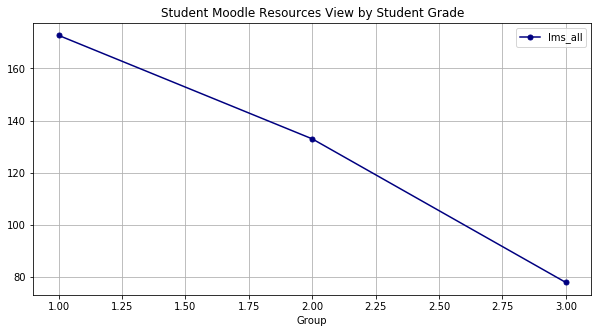

In [50]:
x.plot(x='Group', y='lms_all' ,figsize=(10,5), colormap='jet', marker='.', markersize=10,grid=True,title='Student Moodle Resources View by Student Grade'  )


**Student Moodle Course Access Rate by Student Grade**

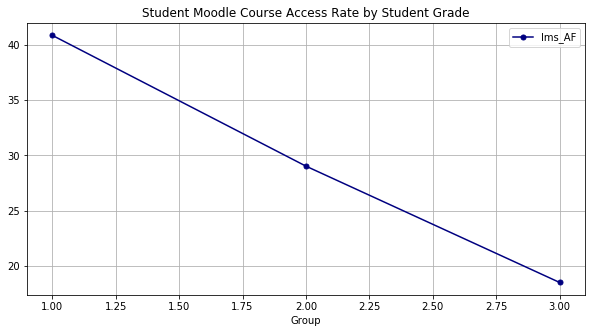

In [51]:
x.plot(x='Group', y='lms_AF' ,figsize=(10,5), colormap='jet', marker='.', markersize=10,grid=True,title='Student Moodle Course Access Rate by Student Grade'  )


In [52]:
#Final[['Group',FGradeCol, 'ExamGrade','CAgrade',	'File',	'Folder',	'Page',	'System','URL','Quiz','diff1','AF']].corr(method='spearman').style.format("{:.5}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

#Final[Final.columns.difference(['Grade'])].corr(method='spearman').style.format("{:.5}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)


In [53]:
#(Final.groupby(['Group'], as_index=False).mean()).plot(x='Group','all')

#import matplotlib.pyplot as plt

#fig, ax = plt.subplots()


#for key, grp in Final.groupby(['Group']):
 #   ax = grp.plot(ax=ax, kind='line', x='x', y='y', c=key, label=key)

#plt.legend(loc='best')
#plt.show()

In [54]:
#Add you code 
# Example 'System','URL','Quiz','Folder','Page'
#col_list = []


#x.plot(kind='line',figsize=(20,10),x='Group',y=col_list)

# Decision Tree Analysis

In [55]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

/Users/geraldine/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [56]:
Final.reset_index()

,index,StudentId,Quiz(out of 15),Labs (out of 15),Practical (out of 20),Total CA (out of 50),Exam,Overall,lms_C_File,lms_C_Folder,lms_C_Forum,lms_C_Quiz,lms_C_System,lms_diff1,lms_diff2,lms_diff3,lms_diff4,lms_diff5,lms_diff6,lms_diff7,lms_diff8,lms_diff9,lms_diff10,lms_diff11,lms_diff12,lms_diff13,lms_diff14,lms_diff15,lms_diff16,lms_diff17,lms_AF,lms_GBD,lms_FLG,Group
0,0,RpsflRsQ,8,6,12,26,66,59.0,86.0,2.0,0.0,1.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26,18.0,109,2
1,1,CjstcYwt,12,13,17,42,76,80.0,94.0,1.0,0.0,1.0,78.0,3.0,2.0,6.0,0.0,6.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54,9.0,109,1
2,2,ORNLQn2i,10,5,13,28,56,56.0,61.0,1.0,0.0,2.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16,20.0,109,2
3,3,IKCbG0Z3,6,9,11,26,48,50.0,36.0,1.0,0.0,3.0,62.0,0.0,0.0,0.0,-5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41,9.0,97,2
4,4,UNttaO86,5,5,14,24,40,44.0,85.0,1.0,0.0,2.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27,19.0,85,2
5,5,6vJMgyQP,13,11,15,39,53,65.5,60.0,2.0,1.0,3.0,94.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33,12.0,112,2
6,6,hEVUkT58,13,15,17,45,88,89.0,128.0,2.0,3.0,1.0,137.0,4.0,2.0,6.0,1.0,5.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48,10.0,109,1
7,7,FkJaGcdP,6,7,14,27,35,44.5,80.0,3.0,0.0,3.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28,15.0,108,2
8,8,LSEukhRA,6,11,16,33,47,56.5,52.0,0.0,1.0,2.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23,21.0,107,2
9,9,r6Pauzkj,5,-,-,5,8,9.0,12.0,0.0,0.0,1.0,11.0,-222.0,-222.0,-222.0,-222.0,-222.0,-222.0,-222.0,-222.0,-222.0,-222.0,-222.0,-222.0,-222.0,-222.0,-222.0,-222.0,-222.0,5,42.0,57,3


In [57]:

#X = pd.DataFrame(Final[[	'CAgrade', 'ExamGrade', 'File', 'Folder',	'Forum', 'Page', 'Quiz', 'System', 'URL', 'diff']])
#XX = pd.DataFrame(Final[[	 'File', 'Folder',	'Forum', 'Page', 'Quiz', 'System', 'URL', 'diff1','AF']])

# All clumns incuding grades
# filter_col = Final._get_numeric_data().columns.difference(['Grade','Group',FGradeCol])
# X = pd.DataFrame(Final[filter_col])


# only LMS data
filter_col = [col for col in Final if col.startswith('lms_')]
X = Final[filter_col]


Y = Final['Group']

X.fillna('-20', inplace=True)
filter_col

['lms_C_File',
 'lms_C_Folder',
 'lms_C_Forum',
 'lms_C_Quiz',
 'lms_C_System',
 'lms_diff1',
 'lms_diff2',
 'lms_diff3',
 'lms_diff4',
 'lms_diff5',
 'lms_diff6',
 'lms_diff7',
 'lms_diff8',
 'lms_diff9',
 'lms_diff10',
 'lms_diff11',
 'lms_diff12',
 'lms_diff13',
 'lms_diff14',
 'lms_diff15',
 'lms_diff16',
 'lms_diff17',
 'lms_AF',
 'lms_GBD',
 'lms_FLG']

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.6, random_state = 100)

In [59]:
#clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=10, min_samples_leaf=5)

clf_gini = DecisionTreeClassifier()
clf_gini.fit(X_train, Y_train)


#classifier = DecisionTreeClassifier()  
#classifier.fit(X_train, y_train)  

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [60]:
#Y

In [61]:
feature_names = list(X.columns)
#class_names   = ["C","B","A"]

#class_names = class_names,

dot_data = tree.export_graphviz(clf_gini, out_file=None,                         
                         feature_names=feature_names,  
                         
                         filled=True, rounded=True,  
                         special_characters=True)  


graph = graphviz.Source(dot_data)  
graph 

#class_names

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [62]:
y_pred = clf_gini.predict(X_test)  


In [63]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(Y_test, y_pred))  
print(classification_report(Y_test, y_pred))  


[[ 3  8  1]
 [ 2 20 11]
 [ 1  6 16]]
             precision    recall  f1-score   support

          1       0.50      0.25      0.33        12
          2       0.59      0.61      0.60        33
          3       0.57      0.70      0.63        23

avg / total       0.57      0.57      0.56        68



In [64]:
print ("Accuracy is ", accuracy_score(Y_test,y_pred)*100)

Accuracy is  57.35294117647059


In [65]:
#cccc = pd.DataFrame({'Predicted':y_pred,'Actual':Y_test })  
#cccc


# Regression Tree

In [66]:
#X = pd.DataFrame(Final[[	'CAgrade', 'ExamGrade', 'File', 'Folder',	'Forum', 'Page', 'Quiz', 'System', 'URL', 'diff']])
#XX = pd.DataFrame(Final[[	 'File', 'Folder',	'Forum', 'Page', 'Quiz', 'System', 'URL', 'diff1','AF']])

filter_col = [col for col in Final if col.startswith('lms_')]
X = pd.DataFrame(Final[filter_col])

Y = pd.DataFrame(Final[FGradeCol])

X.fillna('-20', inplace=True)
filter_col

['lms_C_File',
 'lms_C_Folder',
 'lms_C_Forum',
 'lms_C_Quiz',
 'lms_C_System',
 'lms_diff1',
 'lms_diff2',
 'lms_diff3',
 'lms_diff4',
 'lms_diff5',
 'lms_diff6',
 'lms_diff7',
 'lms_diff8',
 'lms_diff9',
 'lms_diff10',
 'lms_diff11',
 'lms_diff12',
 'lms_diff13',
 'lms_diff14',
 'lms_diff15',
 'lms_diff16',
 'lms_diff17',
 'lms_AF',
 'lms_GBD',
 'lms_FLG']

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.6, random_state = 100)

In [68]:
from sklearn.tree import DecisionTreeRegressor  

regressor = DecisionTreeRegressor()  
regressor.fit(X_train, Y_train) 

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [69]:
y_pred = regressor.predict(X_test)  
y_pred

array([38. , 73. , 42.5, 45.5, 73. , 84. , 84. , 87.5, 49. , 21.5, 38. ,
       81.5, 44. , 38. , 21.5, 73. , 49. , 38. , 73. , 44. , 69.5, 48. ,
       69.5, 69.5, 44. , 50. , 57.5, 50.5, 50. , 73. , 35. , 37. ,  9. ,
       35. , 57.5, 15. , 69.5, 49. , 37. , 59. , 53.5, 17.5, 74.5, 38. ,
       56.5, 15. , 42.5, 21.5, 48. , 17.5, 59. , 37. , 84. , 73. , 31.5,
       45.5, 50. , 50. , 44. , 49. , 21.5, 84. , 50.5, 15. , 74.5, 69.5,
       31.5, 84. ])

In [70]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred))) 

Mean Absolute Error: 18.110294117647058
Mean Squared Error: 466.12132352941177
Root Mean Squared Error: 21.589843064029246


# Regression

In [71]:
#XX = pd.DataFrame(Final[[	'CAgrade', 'ExamGrade', 'File', 'Folder',	'Forum', 'Page', 'Quiz', 'System', 'URL', 'diff1']])

filter_col = [col for col in Final if col.startswith('lms_')]
X = pd.DataFrame(Final[filter_col])


Y = pd.DataFrame(Final[FGradeCol])

# X.fillna('-20', inplace=True)


In [72]:
import statsmodels.api as sm


#X = sm.add_constant(X) 

model = sm.OLS(Y, X.astype(float)).fit()

print (model.summary())

                            OLS Regression Results                            
Dep. Variable:                Overall   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     84.10
Date:                Tue, 30 Oct 2018   Prob (F-statistic):           1.93e-50
Time:                        20:11:34   Log-Likelihood:                -448.98
No. Observations:                 113   AIC:                             936.0
Df Residuals:                      94   BIC:                             987.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
lms_C_File       0.1835      0.066      2.768   